In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import re

file_path = r"" #file path for already organized data
orig = pd.read_csv(file_path)
orig = pd.get_dummies(orig, columns=['Agency', 'Story','Name'], drop_first=True)

Test RMSE: 7.22
Test R²: 0.920


<Figure size 1000x600 with 0 Axes>

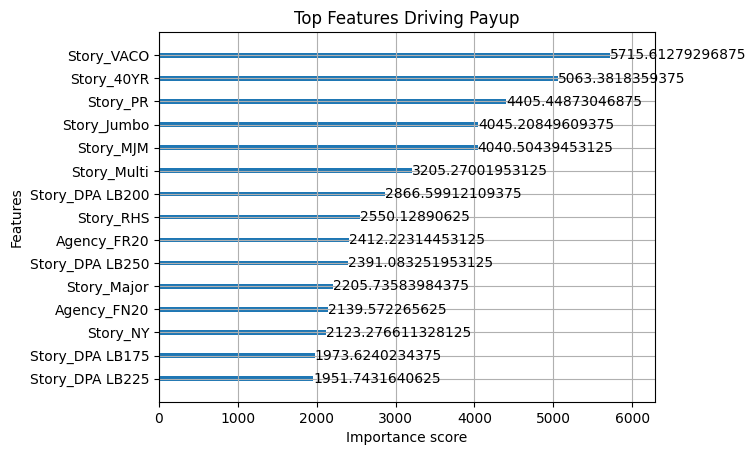

In [8]:
orig['Amount'] = (orig['Amount']
                .astype(str)
                .str.replace(r'[^0-9.-]', '', regex=True)
                .astype(float))

train_df = orig.iloc[:-2000]
test_df = orig.iloc[-2000:]
X_train = train_df.drop(columns=['Color'])
y_train = train_df['Color']

X_test = test_df.drop(columns=['Color'])
y_test = test_df['Color']

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.3f}")

plt.figure(figsize=(10,6))
plot_importance(xgb, importance_type='gain', max_num_features=15)
plt.title("Top Features Driving Payup")
plt.show()



In [ ]:
new_data = pd.read_csv(r"") #data you want to find predictions for

new_data['Amount'] = (new_data['Amount']
                      .astype(str)
                      .str.replace(r'[^0-9.-]', '', regex=True)
                      .astype(float))

dummy_data = pd.get_dummies(new_data.copy(), columns=['Agency', 'Story', 'Name'], drop_first=True)


dummy_data_aligned = dummy_data.reindex(columns=X_train.columns, fill_value=0)


predictions = xgb.predict(dummy_data_aligned)


new_data['Predicted_Color'] = predictions


output_path = r"" #result file name
new_data.to_csv(output_path, index=False)

print(f"\n saved to: {output_path}")


 saved to: S:\TRADING DESK\Traders Only\Victor\Python\Color\Results.csv
